Laboratorio #2 - Modulacion por Amplitud

TAREA # 1 
Construir un sistema básico AM de tipo DSC-SC, incluyendo la etapa de modulación y 
demodulación, puede asumir condiciones óptimas, esto es no ruido o pérdidas o modificaciones 
en frecuencia o fase. 

1- Se recomienda crear una función para la modulación y otra para la demodulación. 
2- Utilice sincronización coherente. 
3- Puede asumir un canal óptimo sin pérdidas entre ambos bloques. 
1- Grafique todas las funciones y salidas involucradas, tanto en el tiempo como en la 
frecuencia. Sea ordenado en la forma en que lo presente en la notebook. Describa lo 
que observa en cada una de ellas. 
4- Para el experimento, considere una señal de tono (información) tipo: 
𝑚(𝑡) ó 𝑓(𝑡) = cos (2𝜋𝑓௠𝑡), de forma que NO se incurra en sobre-modulación. 
5- Realice un análisis completo de los resultados obtenidos, en cada parte funcional del 
sistema de comunicación AM DSB-SC.

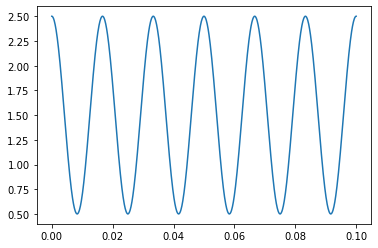

In [8]:
import matplotlib.pyplot as plt
import numpy
from numpy import arange,sin,cos,pi, linspace

#Creación de la señal banda base con frecuencia de 60Hz
def mt(t,f,A):
    m = A*cos(2*pi*f*t) + 1.5*A
    plt.plot(t,m)
    return m

t = linspace(0, 0.1, 1000, endpoint=True)
fm = 60
Am = 1
m = mt(t,fm,Am)

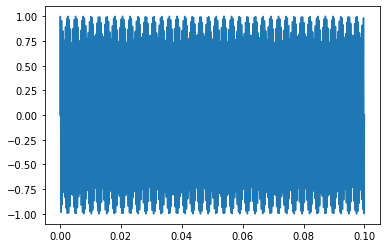

In [9]:
#Creación de la señal portadora con frecuencia de 2.4GHz
def ct(t,f,A):
    c = A*sin(2*pi*f*t)
    plt.plot(t,c)
    return c
fc = 2.4e9
Ac = 1
c = ct(t,fc,Ac)

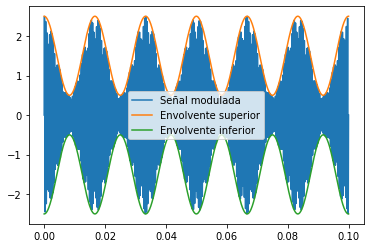

In [10]:
#Modulación de AM DSB-SC, señal modulada
def st(m,c):
    s = m*c
    plt.plot(t,s)
    plt.plot(t,m)
    plt.plot(t,-m)
    plt.legend(["Señal modulada", "Envolvente superior", "Envolvente inferior"])
    return s
s = st(m,c)

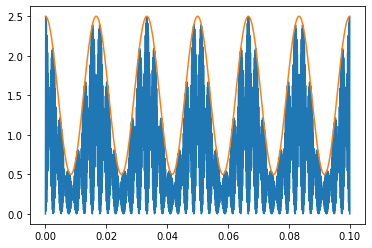

In [4]:
#Demodulación
t = linspace(0, 0.1, 1000, endpoint=True)
sc = s*c

plt.plot(t,sc)
plt.plot(t,m)

In [5]:
#Filtrado de frecuencias altas
from scipy.signal import butter, lfilter, freqz
def butter_lowpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

def butter_lowpass_filter(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = lfilter(b, a, data)
    return y

TAREA # 2 
Usando como base el sistema básico AM de tipo DSC-SC, construido en la sección anterior, 
introduzca una nueva señal de portadora en el bloque demodulador, de manera que pueda 
introducir errores controlados de ∆𝜔 y 𝜃଴.

TAREA #3
Construir un modulador básico AM de tipo DSC-LC, considerando únicamente la etapa de 
modulación: 
1- Se recomienda crear una función para la modulación. 
2- Para el experimento, considere una señal de tono 𝑚(𝑡) ó 𝑓(𝑡) = cos (2𝜋𝑓௠𝑡), de 
forma que SI SE INCURRA en sobre-modulación. 
6- Grafique todas las funciones y salidas involucradas, esto es, 𝑚(𝑡), 𝑐, 𝑠(𝑡), tanto en el 
tiempo como en la frecuencia. Sea ordenado en la forma en que lo presente en la 
notebook. Describa lo que observa en cada una de ellas. 
3- Realice un análisis completo de lo ocurrido en cada parte funcional del sistema de 
modulación AM DSB-SL, basado en las gráficas obtenidas. 
4- Realice un estudio robusto del efecto del factor de modulación 𝜇 = 𝑘௔𝐴௠ durante el 
proceso y en particular en la señal resultante de la modulación, esto es, en la señal 
modulada 𝑠(𝑡), se recomienda la generación y análisis de experimentos para diversos 
valores de 𝜇. 
5- Determine y justifique adecuadamente en que valor de 𝜇 = 𝑘௔𝐴௠ es posible corregir 
de manera óptima el efecto de la sobre-modulación, presente las curvas que 
justifiquen adecuadamente su análisis.